In [1]:
#Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('default')
sns.set()

#Cargo el DataFrame
df = pd.read_csv('events.csv', low_memory = False, parse_dates = ['timestamp'], infer_datetime_format = True,
                    dtype = {'event': 'category','condition': 'category','storage': 'category', 'color': 'category', 'staticpage': 'category', 'campaign_source': 'category', 'search_engine': 'category', 'channel': 'category', 'new_vs_returning': 'category', 'region': 'category', 'country': 'category', 'device_type': 'category'})
df.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5,1,'Cantidad de eventos por dia de la semana')

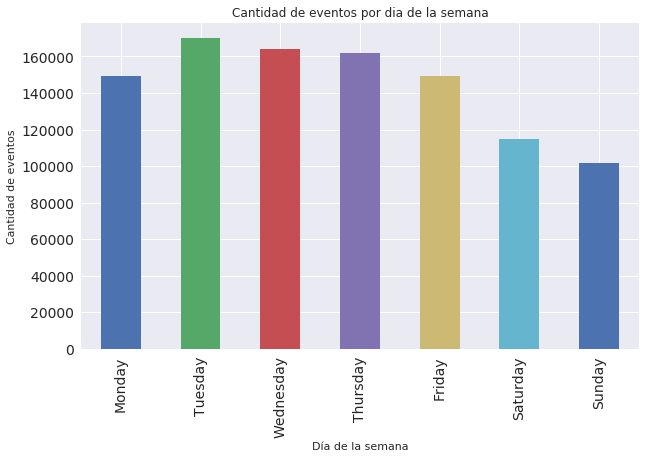

In [15]:
#Vamos a hacer un analisis sobre los dias en los que se produjeron los eventos
dias_semana = df['timestamp'].dt.weekday_name
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dias_semana = pd.Categorical(dias_semana, categories = dias_ordenados, ordered = True)
g = dias_semana.value_counts().plot('bar',figsize=(10,6),fontsize=14)
g.set_ylabel('Cantidad de eventos')
g.set_xlabel('Día de la semana')
g.set_title('Cantidad de eventos por dia de la semana')

In [53]:
tiempo_eventos = pd.DataFrame()
tiempo_eventos['event'] = df['event']
tiempo_eventos['dia_semana'] = df['timestamp'].dt.weekday_name
tiempo_eventos['dia'] = df['timestamp'].dt.day
tiempo_eventos['hora'] = df['timestamp'].dt.hour
tiempo_eventos['mes'] = df['timestamp'].dt.month_name()

hora_weekday_visitas = tiempo_eventos[tiempo_eventos['event'] == 'visited site'].groupby('dia_semana')['hora'].value_counts().to_frame()
hora_weekday_visitas = hora_weekday_visitas.rename(columns = {'hora':'cant_casos'})
hora_weekday_visitas = hora_weekday_visitas.reset_index('hora')
hora_weekday_visitas.index = pd.CategoricalIndex(hora_weekday_visitas.index, categories= dias_ordenados)
hora_weekday_visitas.sort_index(level=0, inplace=True)
hora_weekday_visitas = hora_weekday_visitas.reset_index()

dia_mes_visitas = tiempo_eventos[tiempo_eventos['event'] == 'visited site'].groupby('mes')['dia'].value_counts().to_frame()
dia_mes_visitas = dia_mes_visitas.rename(columns = {'dia':'cant_casos'})
dia_mes_visitas = dia_mes_visitas.reset_index('dia')
dia_mes_visitas.index = pd.CategoricalIndex(dia_mes_visitas.index, categories= ['January', 'February', 'March', 'April', 'May', 'June'])
dia_mes_visitas.sort_index(level=0, inplace=True)
dia_mes_visitas = dia_mes_visitas.reset_index()

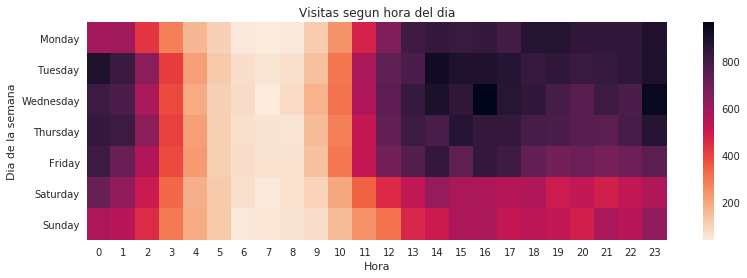

In [51]:
pivot = hora_weekday_visitas.pivot_table(index = 'dia_semana', columns = 'hora', values = 'cant_casos')
cmap = sns.cm.rocket_r
fig, ax = plt.subplots(figsize=(13,4)) 
ax = sns.heatmap(data = pivot, cmap = cmap,ax=ax)
ax.set(xlabel='Hora',ylabel='Dia de la semana', title = 'Visitas segun hora del dia')
ax

Durante el fin de semana la cantidad de visitas es menor, mientras que la mayoria de las visitas se realizan entre las 12 y las 2

[Text(87,0.5,'Dia'),
 Text(0.5,87,'Mes'),
 Text(0.5,1,'Visitas del 1/1/2018 hasta el 15/06/2018')]

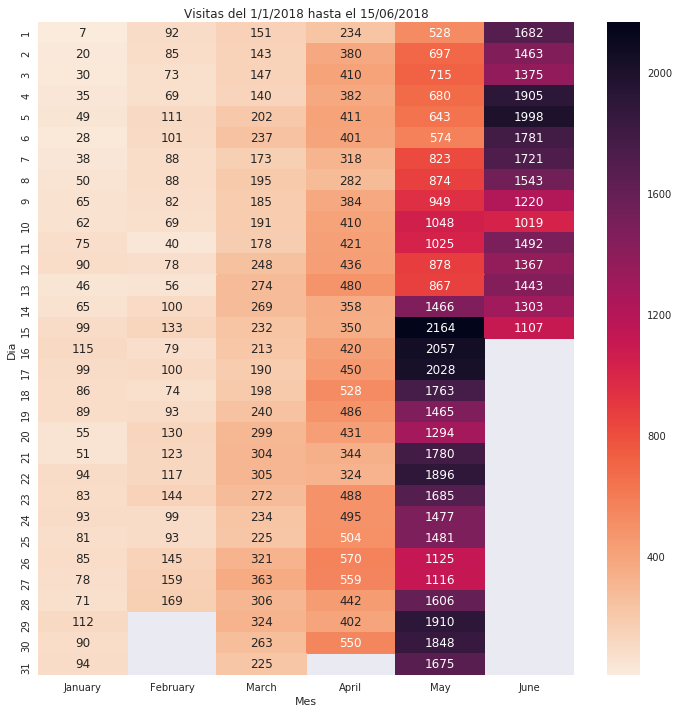

In [62]:
pivot = dia_mes_visitas.pivot_table(index = 'dia', columns = 'mes', values = 'cant_casos')
cmap = sns.cm.rocket_r
sns.set(rc={'figure.figsize':(12,12)})
ax = sns.heatmap(data = pivot, cmap = cmap, annot = True, fmt=".0f")
ax.set(xlabel='Mes', ylabel='Dia', title = 'Visitas del 1/1/2018 hasta el 15/06/2018')